# 7.  Write a program for sharpening an image using unsharp masking. 

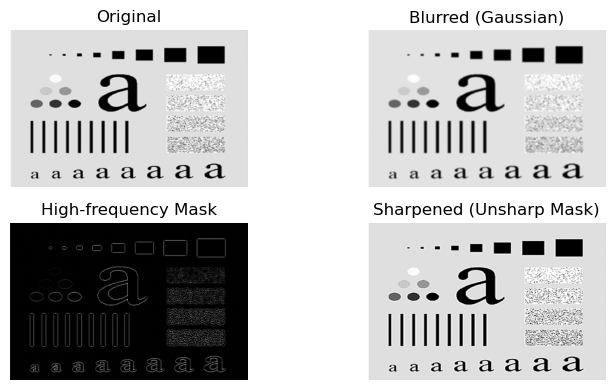

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Cannot read image at {path}")
    return img

def unsharp_masking(image, blur_kernel_size=(5, 5), amount=1.5):
    blurred = cv2.GaussianBlur(image, blur_kernel_size, 0)

    mask = cv2.subtract(image, blurred)

    sharpened = cv2.addWeighted(image, 1.0 + amount, blurred, -amount, 0)

    return blurred, mask, sharpened

def plot_unsharp_results(original, blurred, mask, sharpened):
    plt.figure(figsize=(8, 4))

    plt.subplot(2, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(blurred, cmap='gray')
    plt.title("Blurred (Gaussian)")
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(mask, cmap='gray')
    plt.title("High-frequency Mask")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(sharpened, cmap='gray')
    plt.title("Sharpened (Unsharp Mask)")
    plt.axis('off')

    plt.tight_layout()
    plt.savefig("outimg_problem7.png")
    plt.show()

def main():
    image_path = "../test_imgs/test_img.png"  
    image = read_image(image_path)

    blurred, mask, sharpened = unsharp_masking(image, blur_kernel_size=(5, 5), amount=1.5)
    plot_unsharp_results(image, blurred, mask, sharpened)

if __name__ == "__main__":
    main()
